In [1]:
import pandas as pd
df = pd.read_excel("C:/Users/gupta/Python jypter notebook/Data/Excel2.xlsx")

In [2]:
df.shape

(125, 48)

In [3]:
pd.set_option('display.max_rows', None)
df.isnull().sum().sort_values(ascending=False)

Rank in 2020                                      48
Students per Staff                                47
Rank in 2019                                      46
Rank in 2021                                      38
Research Quality                                  38
International course experience rank 2022-2021    38
International work mobility rank 2022-2021        38
Value for money rank 2022-2021                    38
2020.Overall satisfaction                         35
2020.International board (%)                      35
2020.International students (%)                   35
2020.Average course length (months)               35
2020.Extra languages                              35
2020.International mobility rank                  35
2020.International faculty (%)                    35
2020.Weighted salary (US$)                        35
2020.Faculty with doctorates (%)                  35
Faculty Change                                    30
Satisfaction Change                           

In [4]:
numerical_columns = df.select_dtypes(include=['number'])
print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
     LinkedIn Followers  Instagram engagement %  Research Quality  \
0              114985.0                    0.68              81.4   
1              289801.0                    0.91              38.8   
2              536866.0                    0.45              95.4   
3              190577.0                    3.28              24.9   
4              184493.0                    1.77               NaN   
5              308968.0                    0.65              68.2   
6               36932.0                    0.86              84.0   
7               97316.0                    1.76              96.9   
8              297425.0                    0.61               NaN   
9              207086.0                    1.30               NaN   
10              95715.0                    1.21               NaN   
11             114392.0                    1.00               NaN   
12              72418.0                    2.43              90.2   
13             

In [5]:
categorical_columns = df.select_dtypes(include=['object', 'category'])
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
                                           School Name  \
0                              University of St Gallen   
1                                            HEC Paris   
2                               London Business School   
3                                Essec Business School   
4                                 ESCP Business School   
5                       SDA Bocconi/Università Bocconi   
6                   University College Dublin: Smurfit   
7    Rotterdam School of Management, Erasmus Univer...   
8                                   IE Business School   
9                                Esade Business School   
10                       Stockholm School of Economics   
11    WU (Vienna University of Economics and Business)   
12                              University of Mannheim   
13                    Imperial College Business School   
14            WHU – Otto Beisheim School of Management   
15                               Edhec Business Sch

In [7]:
df['2020.International board (%)'].fillna(0, inplace=True)
df['2020.International board (%)'].replace('0 ††', 0, inplace=True)
df['2020.International board (%)'] = df['2020.International board (%)'].astype(int)

In [8]:
df.columns

Index(['School Name', 'LinkedIn Followers', 'Instagram engagement %',
       'Research Quality', 'Citations per Faculty',
       'Average Experience of Faculty', 'Students per Staff', 'Rank in 2019',
       '2020.Faculty with doctorates (%)', '2020.Weighted salary (US$)',
       '2020.International faculty (%)', '2020.International mobility rank',
       '2020.International board (%)', '2020.Extra languages',
       '2020.Average course length (months)', '2020.Overall satisfaction',
       '2020.International students (%)', '2021.Women on board (%)',
       '2021.Employed at three months (%)', 'Delimited',
       '2021.International faculty (%)', '2021.International mobility rank',
       '2021.Female students (%)', '2022.Careers service rank',
       '2022.International course experience rank', '2022.Internships (%)',
       '2022.Faculty with doctorates (%)', 'Rank in 2020', 'Rank in 2021',
       '2022.Average course length (months)', '2022.Overall satisfaction',
       '2022.Women 

In [9]:
df["binned_group"] = pd.cut(df["Rank in 2019"], bins = 10, labels=["1-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90","91-100"])

In [10]:
df['binned_group'] = df['binned_group'].cat.add_categories('Do Not Stand in Ranking')
df['binned_group'] = df['binned_group'].fillna('Do Not Stand in Ranking')

In [11]:
df['binned_group']

0                         1-10
1                         1-10
2                         1-10
3                         1-10
4                         1-10
5                         1-10
6                         1-10
7                         1-10
8                        11-20
9                        11-20
10                       11-20
11                        1-10
12                       21-30
13                       11-20
14                       11-20
15                       11-20
16                       11-20
17                       21-30
18                       11-20
19                       21-30
20                       41-50
21                       21-30
22                       31-40
23                       31-40
24                       21-30
25                       31-40
26                       31-40
27                       21-30
28                       21-30
29                       41-50
30                       21-30
31                       41-50
32      

In [12]:
df.columns

Index(['School Name', 'LinkedIn Followers', 'Instagram engagement %',
       'Research Quality', 'Citations per Faculty',
       'Average Experience of Faculty', 'Students per Staff', 'Rank in 2019',
       '2020.Faculty with doctorates (%)', '2020.Weighted salary (US$)',
       '2020.International faculty (%)', '2020.International mobility rank',
       '2020.International board (%)', '2020.Extra languages',
       '2020.Average course length (months)', '2020.Overall satisfaction',
       '2020.International students (%)', '2021.Women on board (%)',
       '2021.Employed at three months (%)', 'Delimited',
       '2021.International faculty (%)', '2021.International mobility rank',
       '2021.Female students (%)', '2022.Careers service rank',
       '2022.International course experience rank', '2022.Internships (%)',
       '2022.Faculty with doctorates (%)', 'Rank in 2020', 'Rank in 2021',
       '2022.Average course length (months)', '2022.Overall satisfaction',
       '2022.Women 

In [13]:
X = df.drop(['School Name','binned_group'], axis=1).values

In [14]:
X.shape

(125, 47)

In [15]:
y= df["binned_group"].values

In [16]:
y.shape

(125,)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.impute import SimpleImputer
import numpy as np
imp_num = SimpleImputer(strategy='mean')
X_train = imp_num.fit_transform(X_train)
X_test = imp_num.transform(X_test)

In [19]:
nan_count = np.isnan(X_train).sum()
print("Number of NaN values:", nan_count)

Number of NaN values: 0


In [20]:
nan_count = np.isnan(X_test).sum()
print("Number of NaN values:", nan_count)

Number of NaN values: 0


(100, 47)
(100,)


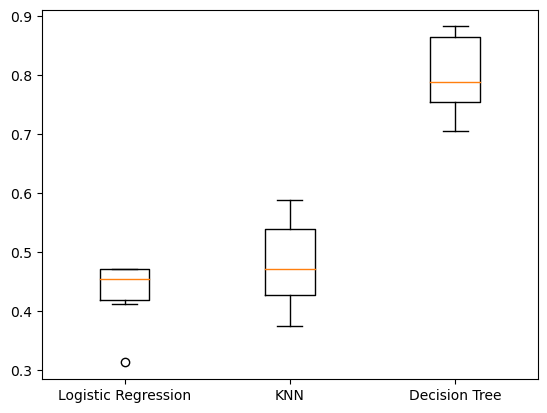

In [21]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(y_train.shape)
models = {"Logistic Regression": LogisticRegression(max_iter=1000), "KNN": KNeighborsClassifier(),
"Decision Tree": DecisionTreeClassifier()}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [22]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 0.4
KNN Test Set Accuracy: 0.32
Decision Tree Test Set Accuracy: 0.92
